# Zindi Image classification (Binary)

In [2]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tqdm import tqdm   # to see process status bar
import os  # to generate new directories
import glob # to gather jpg files
from glob import glob
import shutil  # to move files

import tensorflow as tf

In [4]:
# Input your file directory

file_dir = 'D:/thon/DL/zindi' # Change here with your file directory

# Read train, test and submission csv files

train_df = pd.read_csv(file_dir + '/Train.csv')
test_df = pd.read_csv(file_dir + '/Test.csv')
sample_sub = pd.read_csv(file_dir + '/SampleSubmission.csv')

print(train_df.head())
print('\n')
print(test_df.head())
print('\n')
print(sample_sub.head())

               Image_id  Label
0  id_02amazy34fgh2.jpg      1
1  id_02mh3w48pmyc9.jpg      0
2  id_02rpb463h9d3w.jpg      0
3  id_02wc3jeeao8ol.jpg      1
4  id_03t2hapb8wz8p.jpg      1


               Image_id
0  id_00exusbkgzw1b.jpg
1  id_03dqinf6w0znv.jpg
2  id_046yl0cxn3ybz.jpg
3  id_04athdtx2abyg.jpg
4  id_062aauf9e9jk0.jpg


               Image_id  Label
0  id_00exusbkgzw1b.jpg      0
1  id_03dqinf6w0znv.jpg      0
2  id_046yl0cxn3ybz.jpg      0
3  id_04athdtx2abyg.jpg      0
4  id_062aauf9e9jk0.jpg      0


# Check shape of image, since each image has different shape

In [6]:
### To check the shape of whole images

train_df['width'] = np.nan
train_df['height'] = np.nan
train_df['channel'] = np.nan

test_df['width'] = np.nan
test_df['height'] = np.nan
test_df['channel'] = np.nan


# Set image directory

img_dir = file_dir + '/Images'

# To check train images' shape

for i in tqdm(range(len(train_df))):
  image = img.imread(img_dir + '/' + train_df['Image_id'].loc[i])
  w, h, c = image.shape
  train_df.loc[i, 'width'] = w
  train_df.loc[i, 'height'] = h
  train_df.loc[i, 'channel'] = c

# To check test images' shape

for i in tqdm(range(len(test_df))):
  image = img.imread(img_dir + '/' + test_df['Image_id'].loc[i])
  w, h, c = image.shape
  test_df.loc[i, 'width'] = w
  test_df.loc[i, 'height'] = h
  test_df.loc[i, 'channel'] = c


# Train image's shape

print(train_df[['width', 'height', 'channel']].value_counts())
print('\n')

# Test images' shape

print(test_df[['width', 'height', 'channel']].value_counts())

100%|██████████| 1080/1080 [00:14<00:00, 75.18it/s]

width   height  channel
1024.0  768.0   3.0        526
        1024.0  3.0        431
        765.0   3.0        237
        498.0   3.0        146
768.0   1024.0  3.0        110
3200.0  2000.0  3.0         59
1024.0  640.0   3.0         44
498.0   1024.0  3.0         43
765.0   1024.0  3.0         18
2000.0  3200.0  3.0          3
640.0   1024.0  3.0          2
dtype: int64


width   height  channel
1024.0  768.0   3.0        379
        1024.0  3.0        263
        765.0   3.0        161
        498.0   3.0        113
768.0   1024.0  3.0         73
3200.0  2000.0  3.0         33
1024.0  640.0   3.0         21
498.0   1024.0  3.0         18
765.0   1024.0  3.0         14
2000.0  3200.0  3.0          4
640.0   1024.0  3.0          1
dtype: int64


# Managing Image directories and files

## You don't need to do it twice

In [7]:
### You don't need to do it twice

# Generate new 'train', 'test' image folders in your file_directory

os.makedirs(img_dir + '/train')
os.makedirs(img_dir + '/test')

# Set train and test directories

train_dir = img_dir + '/train'
test_dir = img_dir + '/test'

# Generate '0' / '1' label folder in 'train' folder

os.makedirs(train_dir + '/1')
os.makedirs(train_dir + '/0')

# Set train label 0 and 1 directories

train1_dir = train_dir + '/1'
train0_dir = train_dir + '/0'


### To move files according to train.csv and test.csv's 'Image_id' column

train_file_name = train_df["Image_id"]
train_file_label = train_df["Label"]
test_file_name = test_df["Image_id"]

# Move train images from 'Images' folder to 'train' folder

for i in train_file_name:
    file_source = img_dir + f'/{i}'
    file_destination = train_dir
    shutil.move(file_source, file_destination)


# Move test images from 'Images' folder to 'test' folder

for i in test_file_name:
    file_source = img_dir + f'/{i}'
    file_destination = test_dir
    shutil.move(file_source, file_destination)


# Separate train images to '0' / '1' label folder

for i, name in enumerate(train_file_name):
    file_source = train_dir + f'/{name}'
    file_destination_1 = train1_dir # for Label 1
    file_destination_0 = train0_dir # for Label 0

    if train_file_label[i] == 1:
        shutil.move(file_source, file_destination_1)
    else:
        shutil.move(file_source, file_destination_0)

# Image preprocessing

In [8]:
### Image preprocessing
# Set batch_size, img_height, img_width

batch_size = 32
img_height = 180
img_width = 180


# Train image dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2, # 1619 * 0.8 = 1296 images are for train dataset
    label_mode = 'binary',
    subset = 'training',
    shuffle = True,
    seed = 2021120087,
    image_size = (img_height, img_width),
    batch_size = batch_size)

print('\n')

# Validation image dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2, # 1619 * 0.2 = 323 images are for validation dataset
    label_mode = 'binary',
    subset = "validation",
    shuffle = True,
    seed = 2021120087,
    image_size = (img_height, img_width),
    batch_size = batch_size)

print('\n')

# Test image dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode = None,
    shuffle = False,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 1619 files belonging to 2 classes.
Using 1296 files for training.


Found 1619 files belonging to 2 classes.
Using 323 files for validation.


Found 1080 files belonging to 1 classes.


In [9]:
# Class names (Labels)

class_names = train_ds.class_names
print(class_names)


# Check the train image shapes

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

['0', '1']
(32, 180, 180, 3)
(32, 1)


# Min-Max Normalization

In [14]:
# Set normalization layer

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)


# Min-Max Normalization train_ds

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds))

# Check how well min-max normalization is applied
print(np.min(image_batch), np.max(image_batch))

# Min-Max Normalization for test_ds

normalized_test_ds = test_ds.map(lambda x: (normalization_layer(x)))
test_image_batch = next(iter(normalized_test_ds))

print(np.min(test_image_batch), np.max(test_image_batch))

### Question) Isn't Normalization necessary for validation set???

0.0 1.0
0.0 1.0


In [58]:
### I think this is not necessary
# Maintain images caches in memory

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Define Model using tensorflow

In [15]:
# Model ConvNet

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Model summary

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

# Train model

In [17]:
# Compile model

model.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

# Train model
history = model.fit(train_ds, validation_data = val_ds, epochs = 20, verbose = 0, batch_size = batch_size)

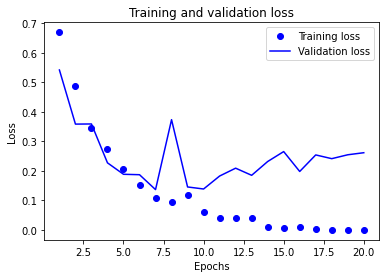

In [18]:
# Visualize validation loss and accuracy loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# To find the best model

In [19]:
# Find the best model using callbacks

model.compile(
    optimizer = 'adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history_test = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callbacks)

Epoch 1/50
41/41 [==============================] - 5s 92ms/step - loss: 0.0498 - accuracy: 0.9799 - val_loss: 0.2324 - val_accuracy: 0.9350
Epoch 2/50
41/41 [==============================] - 4s 90ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2316 - val_accuracy: 0.9381
Epoch 3/50
41/41 [==============================] - 4s 91ms/step - loss: 7.4357e-04 - accuracy: 1.0000 - val_loss: 0.2461 - val_accuracy: 0.9412
Epoch 4/50
41/41 [==============================] - 4s 90ms/step - loss: 2.8264e-04 - accuracy: 1.0000 - val_loss: 0.2629 - val_accuracy: 0.9412
Epoch 5/50
41/41 [==============================] - 4s 89ms/step - loss: 1.6230e-04 - accuracy: 1.0000 - val_loss: 0.2719 - val_accuracy: 0.9412
Epoch 6/50
41/41 [==============================] - 4s 90ms/step - loss: 9.7415e-05 - accuracy: 1.0000 - val_loss: 0.3232 - val_accuracy: 0.9412
Epoch 7/50
41/41 [==============================] - 4s 91ms/step - loss: 9.2353e-05 - accuracy: 1.0000 - val_loss: 0.2869 - val_accuracy: 

In [22]:
# Fit the best model

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")

predictions = test_model.predict(test_ds)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

sample_sub["Label"] = prediction_classes
sample_sub.head()

,Image_id,Label
0,id_00exusbkgzw1b.jpg,0
1,id_03dqinf6w0znv.jpg,0
2,id_046yl0cxn3ybz.jpg,1
3,id_04athdtx2abyg.jpg,0
4,id_062aauf9e9jk0.jpg,0


In [25]:
# Save csv file

sample_sub.to_csv("SampleSubmission.csv", index = False)